<a href="https://www.kaggle.com/code/michaellouiseglean/film-data-analysis-using-python?scriptVersionId=113819994" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <span style="color:#084f8d"> Film Data Analysis Using Python </span> 
### <span style="color:#084f8d"> Building Portfolio on Python Projects </span> 

# 1. Importing Libraries

First thing I did is to import the needed libraries for my analysis.

Mainly pandas, seaborn, numpy and matplotlib.

In [1]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjust the configuration of the plots we will create

# 2. Importing Dataset

We load the data and check the number of rows.

In [2]:
# Import dataset

df = pd.read_csv('/kaggle/input/movies/movies.csv')
print('Number of rows: ', str(len(df.index)))
df.head(6)


Number of rows:  7668


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0


In [3]:
df.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0


# 3. Data Cleaning

We start the analysis by cleaning and verifying the dataframe.

In [4]:
#Count number of blank fields per column
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

Upon checking the number of null values per column, I decided to check the % impact of this null values among the whole data.

In [5]:
#Checking missing data using FOR-LOOP

for col in df.columns:
    pct_missing = round(np.mean(df[col].isnull()),5)
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.01004%
genre - 0.0%
year - 0.0%
released - 0.00026%
score - 0.00039%
votes - 0.00039%
director - 0.0%
writer - 0.00039%
star - 0.00013%
country - 0.00039%
budget - 0.28312%
gross - 0.02465%
company - 0.00222%
runtime - 0.00052%


For the time being, I've decided to keep the majority of entries with missing values in order to have a larger number of observations for each variable. However, because only two films lack a release date, we will look it up online and fill it in to make it easier for the algorithm to convert the release year data type (which we will extract from the released column) to integer.

In [6]:
#Checking null data based on released column

df[df['released'].isnull()] # Films where released is null

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5728,Saw: The Final Chapter,R,Crime,2010,NaN,5.6,93000.0,Kevin Greutert,Patrick Melton,Tobin Bell,NaN,NaN,NaN,NaN,NaN
5730,The Wolfman,R,Drama,2010,NaN,5.8,104000.0,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,NaN,NaN,NaN,NaN,NaN


In [7]:
#Researching the released date of the 2 movies with missing data

df.loc[df['name'].isin(pd.Series(['Saw: The Final Chapter'])),'released']='October 29, 2010 (United States)'
df.loc[df['name'].isin(pd.Series(['The Wolfman'])),'released']='February 12, 2010 (United States)'
print('Null values in released:', str(df['released'].isnull().sum()))

Null values in released: 0


In [8]:
#Verifying if the data was corrected and the release date was reflected

df.iloc[[5728, 5730]]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5728,Saw: The Final Chapter,R,Crime,2010,"October 29, 2010 (United States)",5.6,93000.0,Kevin Greutert,Patrick Melton,Tobin Bell,NaN,NaN,NaN,NaN,NaN
5730,The Wolfman,R,Drama,2010,"February 12, 2010 (United States)",5.8,104000.0,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,NaN,NaN,NaN,NaN,NaN


In [9]:
# Checking the datatypes for each column

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

Although the votes, budget, gross, and runtime columns do not require decimal precision, we cannot change the data type from float to integer due to the presence of null values, so we will leave them as is because it has no effect on the data.

To ensure the accuracy of our analysis, we must now check the dataframe for duplicate data.

In [10]:
# Checking duplicates from the data frame

df.drop_duplicates()
print('Number of rows after dropping duplicates:', str(len(df)))


Number of rows after dropping duplicates: 7668


We can confirm that there are no duplicates from the dataframe.

Since there are 2 columns for dates, we need to verify if the year and the year from release year are the same.

In [11]:
df['year_check'] = np.where((df['released'].str.split(', ').str[-1].astype(str).str[:4] == df['year'].astype(str)), True, False)
print(df['year_check'].value_counts())
print(df[['name', 'year', 'released','year_check']][~df['year_check']][:10])

True     6323
False    1345
Name: year_check, dtype: int64
                                name  year                          released  \
8                        Superman II  1980     June 19, 1981 (United States)   
11            The Gods Must Be Crazy  1980  October 26, 1984 (United States)   
21                     Heaven's Gate  1980    April 24, 1981 (United States)   
33  Cattle Annie and Little Britches  1980    April 24, 1981 (United States)   
40          The Watcher in the Woods  1980   October 9, 1981 (United States)   
49                Lion of the Desert  1980              May 16, 1981 (Japan)   
54                     City of Women  1980     April 8, 1981 (United States)   
59                         Hangar 18  1980          March 13, 1981 (Ireland)   
62                      It's My Turn  1980      February 5, 1981 (Argentina)   
78                           Babylon  1980    November 1980 (United Kingdom)   

    year_check  
8        False  
11       False  
21       

In 1347 records, the year in the year column did not match the actual year in the released column. We also printed the first 10 rows with the value "False" as an example to ensure that the code worked properly.

To resolve this issue, we will extract the value from the released column and create a new column with the correct year, then print the first ten rows of the result.

In [12]:
df['release_year'] = df['released'].str.replace('\D+', '').str[-4:].astype('int64')
print(df[['name', 'released', 'release_year']][:10])

                                             name  \
0                                     The Shining   
1                                 The Blue Lagoon   
2  Star Wars: Episode V - The Empire Strikes Back   
3                                       Airplane!   
4                                      Caddyshack   
5                                 Friday the 13th   
6                              The Blues Brothers   
7                                     Raging Bull   
8                                     Superman II   
9                                 The Long Riders   

                            released  release_year  
0      June 13, 1980 (United States)          1980  
1       July 2, 1980 (United States)          1980  
2      June 20, 1980 (United States)          1980  
3       July 2, 1980 (United States)          1980  
4      July 25, 1980 (United States)          1980  
5        May 9, 1980 (United States)          1980  
6      June 20, 1980 (United States)         

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


# 4. Data Verification and Validation

To start with the data analysis, we will generate the descriptive statistics for the necessary columns.

* score
* votes
* budget
* gross
* runtime

In [13]:
print('Mean values:')
print(round(df[[ 'score', 'votes', 'budget', 'gross', 'runtime']].mean()),2)

print('\nMinimum values:')
print(round(df[[ 'score', 'votes', 'budget', 'gross', 'runtime']].min()),2)

print('\nMaximum values:')
print(round(df[[ 'score', 'votes', 'budget', 'gross', 'runtime']].max()),2)

Mean values:
score             6.0
votes         88109.0
budget     35589876.0
gross      78500541.0
runtime         107.0
dtype: float64 2

Minimum values:
score         2.0
votes         7.0
budget     3000.0
gross       309.0
runtime      55.0
dtype: float64 2

Maximum values:
score      9.000000e+00
votes      2.400000e+06
budget     3.560000e+08
gross      2.847246e+09
runtime    3.660000e+02
dtype: float64 2


According to the output above, the data spans the years 1980 to 2020, the scores range from 1 to 10, and the average film runs 107 minutes. 

The largest and smallest votes, gross and budget, differ significantly, but this could be attributed to the popularity of the respective films. 

The longest runtime is 366 minutes, or approximately 6 hours, so we'll look at which film generated this value, as well as the other films with the longest duration.



We need to check now the columns with string values: 
(just showing the first and last 20 company names)


In [14]:
# showing the data of string columns
print('rating')
print(np.sort(pd.unique(df['rating'].astype(str).values)))
print('\ngenre')
print(np.sort(pd.unique(df['genre'].astype(str).values)))
print('\ndirector')
print(np.sort(pd.unique(df['director'].astype(str).values)))
print('\ncountry')
print(np.sort(pd.unique(df['country'].astype(str).values)))
print('\ncompany')
print(np.sort(pd.unique(df['company'].astype(str).values))[:10])
print(np.sort(pd.unique(df['company'].astype(str).values))[-10:])

rating
['Approved' 'G' 'NC-17' 'Not Rated' 'PG' 'PG-13' 'R' 'TV-14' 'TV-MA'
 'TV-PG' 'Unrated' 'X' 'nan']

genre
['Action' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime' 'Drama'
 'Family' 'Fantasy' 'History' 'Horror' 'Music' 'Musical' 'Mystery'
 'Romance' 'Sci-Fi' 'Sport' 'Thriller' 'Western']

director
['A.R. Murugadoss' 'Aamir Khan' 'Aaron Blaise' ... 'Élie Chouraqui'
 'Éric Rohmer' 'Éva Gárdos']

country
['Argentina' 'Aruba' 'Australia' 'Austria' 'Belgium' 'Brazil' 'Canada'
 'Chile' 'China' 'Colombia' 'Czech Republic' 'Denmark'
 'Federal Republic of Yugoslavia' 'Finland' 'France' 'Germany' 'Greece'
 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Ireland'
 'Israel' 'Italy' 'Jamaica' 'Japan' 'Kenya' 'Lebanon' 'Libya' 'Malta'
 'Mexico' 'Netherlands' 'New Zealand' 'Norway' 'Panama' 'Philippines'
 'Poland' 'Portugal' 'Republic of Macedonia' 'Romania' 'Russia' 'Serbia'
 'South Africa' 'South Korea' 'Soviet Union' 'Spain' 'Sweden'
 'Switzerland' 'Taiwan' 'Thailand' 'Turk

The data appears to be accurate, with the exception of the rating, which can be equated with "Unrated." Therefore we need to combine this 2 rating to "Unrated".

In [15]:
# Replacing "Unrated" by "Not rated"
df["rating"].replace("Not rated", "Unrated", inplace=True)
print(np.sort(pd.unique(df['rating'].astype(str).values)))

['Approved' 'G' 'NC-17' 'Not Rated' 'PG' 'PG-13' 'R' 'TV-14' 'TV-MA'
 'TV-PG' 'Unrated' 'X' 'nan']


# 5. Data Analysis

We will use various statistical tools to extract various insights from our dataframe.

**Here are the Top 5 movies with the longest runtime:**

In [16]:
print(df[['name', 'year', 'runtime']].sort_values(by=['runtime'], ascending=False)[:5])

                            name  year  runtime
4396           The Best of Youth  2003    366.0
1218               Little Dorrit  1987    357.0
2280                  Gettysburg  1993    271.0
2888                      Hamlet  1996    242.0
1868  The Beautiful Troublemaker  1991    238.0


**Avatar** is still the highest-grossing film of all time followed by Avengers: End game.

In [17]:
print(df[['name', 'year', 'gross']].sort_values(by=['gross'], ascending=False)[:5])

                                            name  year         gross
5445                                      Avatar  2009  2.847246e+09
7445                           Avengers: Endgame  2019  2.797501e+09
3045                                     Titanic  1997  2.201647e+09
6663  Star Wars: Episode VII - The Force Awakens  2015  2.069522e+09
7244                      Avengers: Infinity War  2018  2.048360e+09


Let's see which variables have the highest correlation with the gross of the films. 

**The initial hypothesis is that films with a high budget and a high score tend to gross more money.** 

To see if this assumption is correct, we'll create a correlation matrix.

[Text(0.5, 1.0, 'Correlation Matrix')]

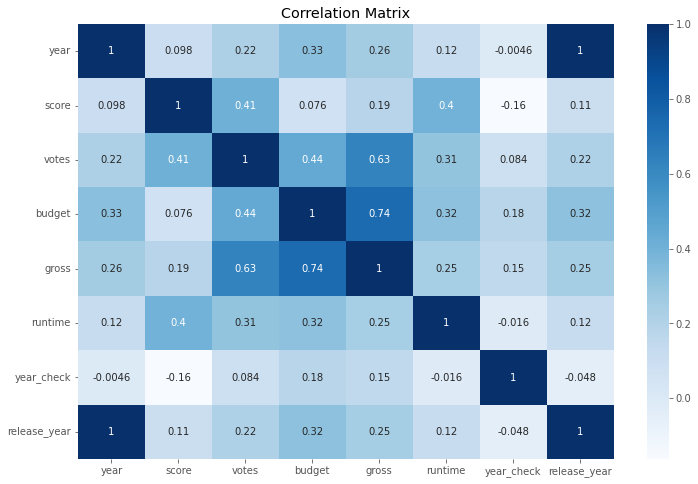

In [18]:
#Using Pearson Correlation Coefficient

correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='Blues').set(title='Correlation Matrix')

Budget and votes have the strongest positive correlation with gross domestic product (0.74 and 0.63, respectively). This relationship is understandable: for a project to be successful, the revenue generated must be sufficient to cover the money invested in the project and generate profit. High-grossing films have a larger audience, which means more people will review the film, resulting in more votes. According to the data, the film's success is rarely indicative of its quality based on score, but this is also influenced by the number of people voting. Because lower-grossing films receive fewer votes, the sample size is smaller, potentially leading to biased scores.

Text(0, 0.5, 'Gross Earnings')

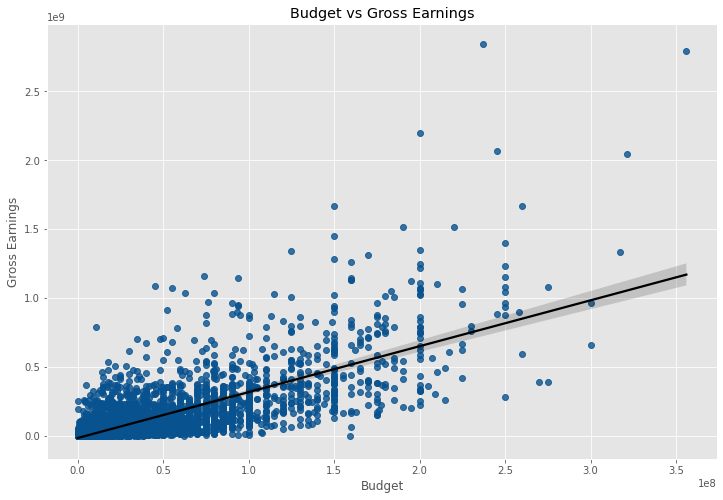

In [19]:
# Plot the budget and gross using seaborn

sns.regplot(x = 'budget', y= 'gross', data=df,scatter_kws = {"color": "#08528f"} , line_kws = {"color": "black"})
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')

Now checking the correlation between Votes and Gross Earnings:

Text(0, 0.5, 'Gross Earnings')

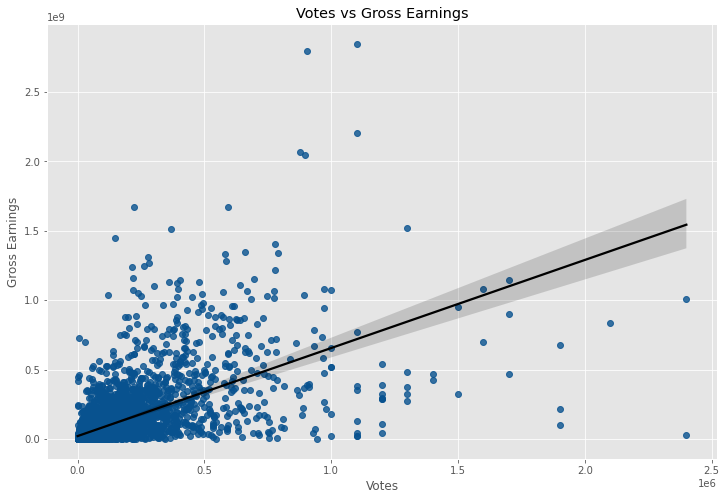

In [20]:
# Plot the votes and gross using seaborn

sns.regplot(x = 'votes', y= 'gross', data=df,scatter_kws = {"color": "#08528f"} , line_kws = {"color": "black"})
plt.title('Votes vs Gross Earnings')
plt.xlabel('Votes')
plt.ylabel('Gross Earnings')

The scatter plots confirm the **positive relationship** between gross and the two variables, but it is clear that there are outliers in the data, which affects the Pearson correlation coefficient, making it not the most reliable method of data analysis. It is beyond the scope of this project, but using other methods of analysis to gain a more comprehensive understanding is recommended.

Following that, it will be interesting to examine trends over time. We'll see if there were any changes in budget, gross, and score between 1980 and 2020. which is the time span covered by this dataset.

To begin, we aggregate the data and group it by release year.

In [21]:
#Data aggregation grouped by "Year"

df_aggregated = df.groupby(df['year']).agg({'budget': ['sum'], 'gross': ['sum'], 'score': ['mean'], 'name': ['count']})
df_aggregated.head(10)


,budget,gross,score,name
,sum,sum,mean,count
year,,,,
1980,5.688500e+08,2.483667e+09,6.304348,92
1981,7.094500e+08,2.520065e+09,6.302655,113
1982,8.366700e+08,3.187581e+09,6.292063,126
1983,8.939756e+08,2.750005e+09,6.022917,144
1984,1.116326e+09,3.533092e+09,6.186905,168
1985,1.220510e+09,3.691509e+09,6.309500,200
1986,1.264787e+09,3.647512e+09,6.152500,200
1987,1.382543e+09,4.033434e+09,6.217000,200


To visualize the trend, we plot the time series data of total budget and gross per year on a line chart.

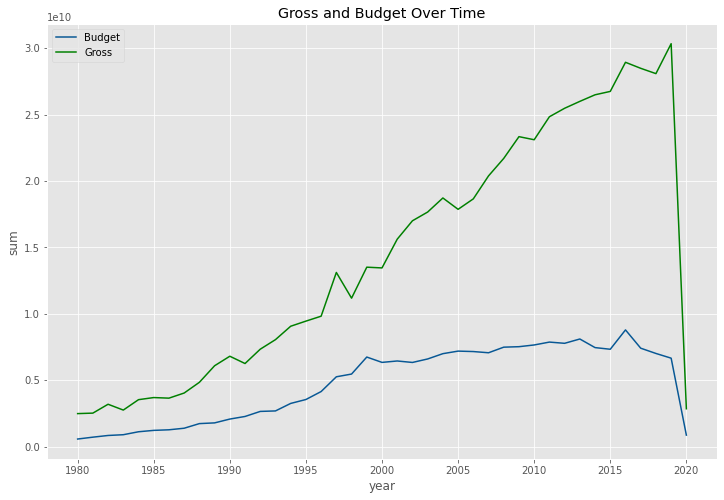

In [22]:
#Line Trend using seaborn

sns.lineplot(data=df_aggregated, x='year', y=df_aggregated['budget']['sum'], color='#085895')
sns.lineplot(data=df_aggregated, x='year', y=df_aggregated['gross']['sum'], color='green')
plt.title('Gross and Budget Over Time')
plt.legend(labels=["Budget","Gross"])
plt.show()


This demonstrates that the majority of film grosses are always greater than the budget, implying that the film industry was profitable until the pandemic in 2020.

Indeed, we can examine the average score of films released each year by plotting it on a line chart.

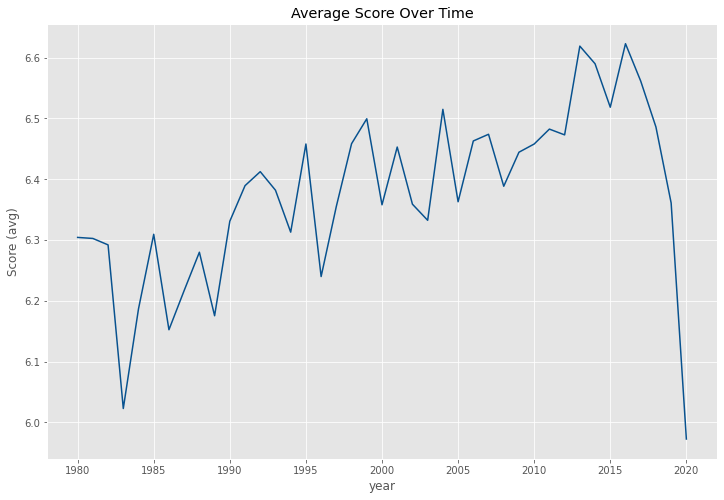

In [23]:
sns.lineplot(data=df_aggregated, x='year', y=df_aggregated['score']['mean'], color='#08528f')
plt.ylabel('Score (avg)')
plt.title('Average Score Over Time')
plt.show()

This graph has a lot more variation, but the overall trend was positive until a sharp decline in 2020. As a result, not only were fewer films released in the first year of the pandemic, but their quality (or, at the very least, viewer satisfaction) was lower on average.

When the data for subsequent years becomes available, it will be interesting to see. Time will tell how long the film industry will take to recover and return to pre-covid levels. With overall costs rising across the board, it may be a difficult journey, as film production costs are likely to have increased and spending habits have changed.